# Module 4: Labs Bivariate analyse - Twee kwalitatieve variabelen

In [114]:
# Importing the necessary packages
import numpy as np                                  # "Scientific computing"
import scipy.stats as stats                         # Statistical tests

import pandas as pd                                 # Data Frame
from pandas.api.types import CategoricalDtype

import matplotlib.pyplot as plt                     # Basic visualisation
from statsmodels.graphics.mosaicplot import mosaic  # Mosaic diagram
import seaborn as sns                               # Advanced data visualisation

# Test for Independence

The Chi-square test for independence looks for an association between two categorical variables within the same population. Unlike the goodness of fit test, the test for independence does not compare a single observed variable to a theoretical population, but rather two variables within a sample set to one another.

* Null Hypothesis (Ho): There is no association between the two categorical variables in the population of interest.
* Alternative Hypothesis (Ha): There is no association between the two categorical variables in the population of interest.

# Goodness-of-Fit Test

The Chi-square goodness of fit test is used to compare a randomly collected sample containing a single, categorical variable to a larger population. This test is most commonly used to compare a random sample to the population from which it was potentially collected.

* Null Hypothesis (Ho): The null hypothesis (Ho) is that the observed frequencies are the same (except for chance variation) as the expected frequencies. The collected data is consistent with the population distribution.
* Alternative Hypothesis (Ha): The collected data is not consistent with the population distribution.

## Labo 1 - Influence of background music on purchasing behaviour

Market research shows that background music in a supermarket can influence the purchasing behaviour of customers. A study compared three methods: no music, French chansons and Italian hits. In each case, the number of bottles of French, Italian and other wines sold was counted (Ryan, et al., 1998).

Maak een kruistabel voor de achtergrond muziek t.o.v. het aankoopgedrag van de klanten. Achterhaal de maginale totalen en bereken de verwachte resultaten. Bereken zowel de Chi² testen alsook de Cramer's V test. Verzorg de dataset van een mooie visualisatie door middel van een staafdiagram die de percentages tussen de types wijn toont, een geclusterde staafdiagram en een gestapelde staafdiagram.

Resultaten van de Chi² en Cramer's V:
* χ² ≈ 18.279
* Cramér's V ≈ 0.194

In [115]:
mzw = pd.read_csv('https://raw.githubusercontent.com/HoGentTIN/dsai-en-labs/main/data/MuziekWijn.csv', delimiter=',')

In [116]:
mzw.head()

,Muziek,Wijn
0,Geen,Franse
1,Franse,Franse
2,Franse,Italiaanse
3,Italiaanse,Andere
4,Italiaanse,Franse


Er is een `sneaky` fout bij de kolomnamen. Wijn heeft een spatie te veel.

In [117]:
mzw.columns

Index(['Muziek', ' Wijn'], dtype='object')

Je kan met volgend commando de kolomnaam gaan aanpassen. Geef eerst de oorspronkelijk kolomnaam mee en dan de nieuwe naam. Je kan meerdere kolommen in one-go gaan aanpassen.

`df = df.rename(columns={'ab': 'abc'})`

`{'Te veranderen kolomnaam': 'Gewenste nieuwe kolomnaam'}`

In [118]:

mzw = mzw.rename(columns={' Wijn': 'Wijn'})
mzw.columns # Fixed :D

Index(['Muziek', 'Wijn'], dtype='object')

Hieronder maken we een kruistabel voor de Muziek en Wijn variabelen. Eerst geef je de onafhankelijk veranderlijke mee en als tweede geef je de afhankelijke veranderlijke mee. We hebben hier twee waarden die berekend moeten worden dus `margin=True` mag je weglaten.

In [119]:
observed = pd.crosstab(mzw.Muziek, mzw.Wijn)
observed

Wijn,Andere,Franse,Italiaanse
Muziek,,,
Franse,35,39,1
Geen,43,30,11
Italiaanse,35,30,19


`Om de Chi² test uit te voeren hebben wij minstens twee zaken nodig: de verwachte resultaten en de geobserveerde resultaten.`

Hieronder berekenen we de marginale totalen van de geobserveerde resultaten. Hiervoor heb je de som nodig van de geobserveerde waarden. 
`axis=1` geeft aan dat we rij per rij gaan bereken. Deze som gaan wij opslaan onder de rijen variabele.
Als we axis niet vermelden bij de som wordt dit standaard `axis=0`. Dit zijn de kolommen.

In [120]:
rijen = observed.sum(axis=1)
kolommen = observed.sum()
n = rijen.sum()

print(f'{rijen}')
print(f'{kolommen}')
print(f'De som van alle rijen is {n}')

Muziek
Franse        75
Geen          84
Italiaanse    84
dtype: int64
Wijn
 Andere        113
 Franse         99
 Italiaanse     31
dtype: int64
De som van alle rijen is 243


Hieronder berekenen wij de verwachte resultaten. 

In [121]:
result = np.outer(rijen, kolommen) / n
result_rij = np.sum(result, axis=1)
result_kolom = np.sum(result, axis=0)

print(result_rij)
print(result_kolom)
print(f'Observaties: {result_kolom.sum()}')

[75. 84. 84.]
[113.  99.  31.]
Observaties: 243.0


We hebben twee meeteenheden om twee kwalitatieve waarden met elkaar te vergelijken. Hieronder berekenen we `Chi²`.

We kunnen Chi² interpreteren als een waarde die aantoont hoe groot het verschil is tussen de verhoudingen in beide kolommen. Chi² heeft een nulwaarde als er géén verschil is tussen de verhoudingen in de kolommen van een kruistabel. Met andere woorden als er geen samenhang tussen de variabelen is.

`Hoe groter de waarde, hoe groter de onderlinge verschillen tussen de kolommen en hoe groter dus ook de samenhang.`

In [122]:
diffs = (result - observed)**2 / result
diffs

Wijn,Andere,Franse,Italiaanse
Muziek,,,
Franse,0.000437,2.333737,7.672417
Geen,0.397063,0.520924,0.007524
Italiaanse,0.422348,0.520924,6.403837


In [123]:
chi_sq = diffs.values.sum()
print('X² %.3f' %chi_sq)

X² 18.279


Hieronder berekenen we Cramer's V.

In [124]:
dof = min(observed.shape) - 1
cramers_v = np.sqrt(chi_sq / (dof * n))
cramers_v


0.19393696480652944

Hieronder maken we een staafdiagram met alle rijen waar geen muziek aan het spelen was. We vragen eerst de waarden op als percentage en we delen ieder aantal door de totale som. De totale som bereken je met `np.sum(Series)`.
De `X-as` stelt de verschillende waarden voor. Op de `Y-as` wordt het percentage gebruikt.

<AxesSubplot:xlabel='Wijn', ylabel='Geen'>

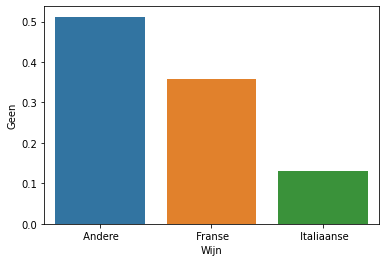

In [125]:
# Vraag alle rijen op waar geen muziek aan het spelen was.
noMusic = observed.loc['Geen']

# Vraag de waarden op in percentage. Deel ieder aantal door de totale som.
# Totale som is np.sum(Series)
noMusicPerc = observed.loc['Geen'] / np.sum(observed.loc['Geen'])

# De X-as stelt de verschillende waarden voor.
# Op de Y-as wordt het percentage gebruikt.
sns.barplot(x=noMusic.index, y=noMusicPerc)

Hieronder gaan we een staafdiagram tonen met alle soorten muziek. De wijnen gaan we meegeven onder de `hue` parameter. Dit is een geclusterde bar chart.

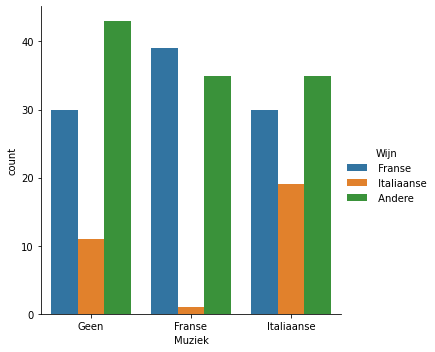

In [126]:
sns.catplot(data=mzw, x="Muziek", hue="Wijn", kind="count")

Hieronder gaan we een gestapelde staafdiagram maken. We kunnen stapelen met behulp van het `stacked` attribuut. Dit moeten we simpelweg op True plaatsen. Als je dit niet wilt kan je het op False laten staan. Bij False zullen de staven naast elkaar staan.

<AxesSubplot:xlabel='Muziek'>

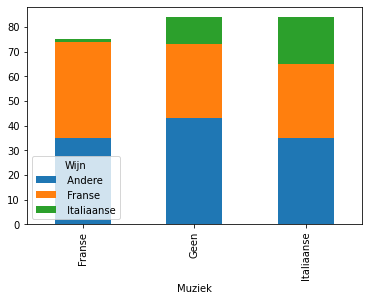

In [127]:
observed.plot(kind='bar', stacked=True)

## Labo 2 - Survey

Eerst maken we een frequentietabel voor de twee variabelen. De onafhankelijke variabelen komen eerst. Vervolgens gaan we de relatie tussen de twee variabelen gaan visualiseren. Om het verband tussen de twee variabelen te testen gaan we een Chi² test gaan uitvoeren met daarbij ook het bereken van de $g$ en $p$ waarden. Wij werken met een significantieniveau van `0.05`.

We bekijken of de nulhypothese aanvaard of verworpen wordt. We geven een antwoord op de vraag of de twee variabelen een verband tonen. Als laatst berekenen we Cramer's V.


De volgende variabelen moeten bekeken worden:

| Onafhankelijke variabele          | Afhankelijke variabele                        |
|:------------------------------ |:-------------------------------------------|
| `Exer`   | `Smoke`                                    |
| `Sex`                  | `Smoke`                                    |
| `W.Hnd`        | `Fold` |
| `Sex`                          | `W.Hnd`                                    |

Results of the main calculations (rounded up to 3 decimal places):

- `Exer/Smoke`: χ² ≈ 5.489, g ≈ 12.592, p ≈ 0.483
- `W.Hnd/Fold`: χ² ≈ 1.581, g ≈ 5.992, p ≈ 0.454
- `Sex/Smoke`: χ² ≈ 3.554, g ≈ 7.815, p ≈ 0.314
- `Sex/W.Hnd`: χ² ≈ 0.236, g ≈ 3.842, p ≈ 0.627

Eerst lezen we de gehele dataset in.

In [128]:
data = pd.read_csv("https://raw.githubusercontent.com/HoGentTIN/dsai-en-labs/main/data/survey.csv")
data

,Unnamed: 0,Sex,Wr.Hnd,NW.Hnd,W.Hnd,Fold,Pulse,Clap,Exer,Smoke,Height,M.I,Age
0,1,Female,18.5,18.0,Right,R on L,92.0,Left,Some,Never,173.0,Metric,18.250
1,2,Male,19.5,20.5,Left,R on L,104.0,Left,None,Regul,177.8,Imperial,17.583
2,3,Male,18.0,13.3,Right,L on R,87.0,Neither,None,Occas,NaN,NaN,16.917
3,4,Male,18.8,18.9,Right,R on L,NaN,Neither,None,Never,160.0,Metric,20.333
4,5,Male,20.0,20.0,Right,Neither,35.0,Right,Some,Never,165.0,Metric,23.667
...,...,...,...,...,...,...,...,...,...,...,...,...,...
232,233,Female,18.0,18.0,Right,L on R,85.0,Right,Some,Never,165.1,Imperial,17.667
233,234,Female,18.5,18.0,Right,L on R,88.0,Right,Some,Never,160.0,Metric,16.917
234,235,Female,17.5,16.5,Right,R on L,NaN,Right,Some,Never,170.0,Metric,18.583
235,236,Male,21.0,21.5,Right,R on L,90.0,Right,Some,Never,183.0,Metric,17.167


Wat zijn de verschillende waarden tussen Exer en Smoke? Verander beide variabelen naar ordinale variabelen met een specifieke volgorde. Hieronder passen we de kolommen aan naar variabelen van het categorische datatype. We geven verschillende categoriëen mee. De kolommen slaan we ook opnieuw op.

In [129]:
data['Exer'] = data['Exer'].astype(CategoricalDtype(categories=['None', 'Some', 'Freq']))
data['Smoke'] = data['Smoke'].astype(CategoricalDtype(categories=['Never', 'Occas', 'Regul', 'Heavy']))

De correcte resultaten afgerond op drie plaatsen na de komma.

- `Exer/Smoke`: χ² ≈ 5.489, g ≈ 12.592, p ≈ 0.483
- `W.Hnd/Fold`: χ² ≈ 1.581, g ≈ 5.992, p ≈ 0.454
- `Sex/Smoke`: χ² ≈ 3.554, g ≈ 7.815, p ≈ 0.314
- `Sex/W.Hnd`: χ² ≈ 0.236, g ≈ 3.842, p ≈ 0.627

Exer/Smoke: χ² ≈ 5.489, g ≈ 12.592, p ≈ 0.483

In [130]:
alpha = 0.05

observerd = pd.crosstab(data['Exer'], data['Smoke'], margins=False)

# vier waarden ophalen uit de contingency methode
chi2, p, dof, expected = stats.chi2_contingency(observerd)

# g-waarde berekenen
g = stats.chi2.isf(alpha, dof)

print("Chi-squared:         %.4f" % chi2)
print("G-waarde:            %.4f" % g)
print("P-waarde:            %.4f" % p)

Chi-squared:         5.4885
G-waarde:            12.5916
P-waarde:            0.4828


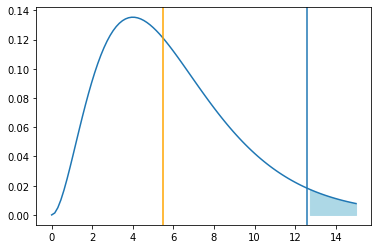

In [131]:
# Plot of the case:
# x-values:
x = np.linspace(0, 15, num=100)
# probability density of the chi-squared distribution with 4 degrees of freedom
y = stats.chi2.pdf(x, df=dof)
# the number q for which the right tail probability is exactly 5%:
q = stats.chi2.isf(alpha, df=dof)

fig, tplot = plt.subplots(1, 1)
tplot.plot(x, y)                     # probability density
tplot.fill_between(x, y, where=x>=q, # critical area
    color='lightblue')
tplot.axvline(q)                     # critical value
tplot.axvline(chi2, color='orange')  # chi-squared


W.Hnd/Fold: χ² ≈ 1.581, g ≈ 5.992, p ≈ 0.454

In [132]:
alpha = 0.05
observerd = pd.crosstab(data['W.Hnd'], data['Fold'], margins=False)
chi2, p, dpf, expected = stats.chi2_contingency(observerd)
g = stats.chi2.isf(alpha, dof)

print("Chi-squared:         %.4f" % chi2)
print("G-waarde:            %.4f" % g)
print("P-waarde:            %.4f" % p)

Chi-squared:         1.5814
G-waarde:            12.5916
P-waarde:            0.4535


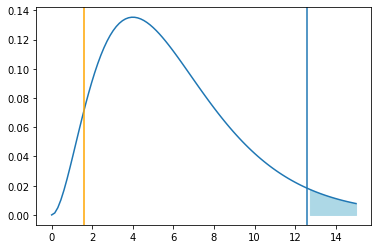

In [133]:
# Plot of the case:
# x-values:
x = np.linspace(0, 15, num=100)
# probability density of the chi-squared distribution with 4 degrees of freedom
y = stats.chi2.pdf(x, df=dof)
# the number q for which the right tail probability is exactly 5%:
q = stats.chi2.isf(alpha, df=dof)

fig, tplot = plt.subplots(1, 1)
tplot.plot(x, y)                     # probability density
tplot.fill_between(x, y, where=x>=q, # critical area
    color='lightblue')
tplot.axvline(q)                     # critical value
tplot.axvline(chi2, color='orange')  # chi-squared

Sex/Smoke: χ² ≈ 3.554, g ≈ 7.815, p ≈ 0.314

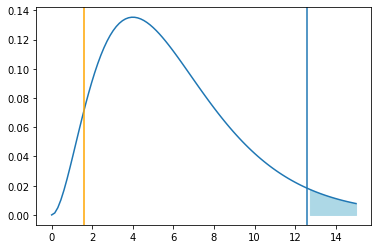

In [134]:
# Plot of the case:
# x-values:
x = np.linspace(0, 15, num=100)
# probability density of the chi-squared distribution with 4 degrees of freedom
y = stats.chi2.pdf(x, df=dof)
# the number q for which the right tail probability is exactly 5%:
q = stats.chi2.isf(alpha, df=dof)

fig, tplot = plt.subplots(1, 1)
tplot.plot(x, y)                     # probability density
tplot.fill_between(x, y, where=x>=q, # critical area
    color='lightblue')
tplot.axvline(q)                     # critical value
tplot.axvline(chi2, color='orange')  # chi-squared

Sex/W.Hnd: χ² ≈ 0.236, g ≈ 3.842, p ≈ 0.627

In [135]:
alpha = 0.05
observerd = pd.crosstab(data['Sex'], data['W.Hnd'], margins=False)
chi2, p, dof, expected = stats.chi2_contingency(observerd)
g = stats.chi2.isf(alpha, dof)

print("Chi-squared:         %.4f" % chi2)
print("G-waarde:            %.4f" % g)
print("P-waarde:            %.4f" % p)

Chi-squared:         0.2356
G-waarde:            3.8415
P-waarde:            0.6274


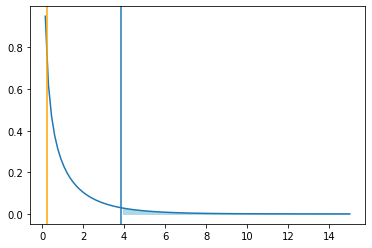

In [136]:
x = np.linspace(0, 15, num=100)
y = stats.chi2.pdf(x, df=dof)
q = stats.chi2.isf(alpha, df=dof)

fig, tplot = plt.subplots(1,1)
tplot.plot(x,y)
tplot.fill_between(x,y,where=x>=q, color='lightblue')

tplot.axvline(q)
tplot.axvline(chi2, color='orange')

## Labo 3 - Digimeter

Voor deze oefeningen werken we met twee dataframes: `data/leeftijden-digimeter.csv` wat de relatieve voorkomens bevat en `data/leeftijden-bestat-vl.csv` wat de absolute waarden bevat van de verschillende leeftijdscategorieën.

1. Maak eerst een samenvatting van alle categorieën zodat je overeenkomende categorieën hebt in Digimeter. Je zal merken dat er in de de ene dataframe veel te veel zijn. Als we dit niet oplossen zullen we een out-of-bounds fout krijgen.

2. Voor de goodness-of-fit-test hebben we absolute voorkomens nodig van de geeobserveerde waarden uit het sample.

3. Bereken de verwachtte percentages voor de populatie in het geheel.

4. Voer de goodness-of-fit test uit op de verdeling van leeftijdscategorieën in de Digimeter sample. Geef aan of de sample representatief is voor de Vlaamse populatie.

Volgende resultaten, afgerond op drie cijfers na de komma, zou je moeten uitkomen

- χ² ≈ 6.700 (df = 6),
- g ≈ 12.592,
- p ≈ 0.350

In [137]:
digi = pd.read_csv('https://raw.githubusercontent.com/HoGentTIN/dsai-en-labs/main/data/leeftijden-digimeter.csv')
bestat = pd.read_csv('https://raw.githubusercontent.com/HoGentTIN/dsai-en-labs/main/data/leeftijden-bestat-vl.csv')

We zitten met veel te gedetailleerde leeftijdsgroepen in het Bestat dataframe. Dit passen we aan naar groepen die overeenkomen met die uit Digimeter. We `filteren `de eerste drie leeftijdsgroepen uit het dataframe. We `mappen` de gedetailleerde leeftijdsgroepen aan de hand van de leeftijdsgroepen van Digimeter. Dus 20-24 --> 20-29 of 40-44 --> 40-49. 

Uiteindelijk zijn alle waarden groter dan 64 null-waarden nu omdat ze geen waarde hebben toegekend. Dit passen we aan zodat alle null-waarden automatisch '64+' als waarde krijgen. Dit doen we met `fillna`.

In [138]:
filterAgeGroup = (bestat['age.group'] != '0-5')
filterAgeGroup2 = (bestat['age.group'] != '5-9')
filterAgeGroup3 = (bestat['age.group'] != '10-14')
bestat = bestat[filterAgeGroup & filterAgeGroup2 & filterAgeGroup3]

d={'15-19': '15-19', '20-24': '20-29', '25-29': '20-29', '30-34': '30-39', '35-39': '30-39', '40-44': '40-49', '45-49': '40-49','50-54': '50-59', '55-59': '50-59','60-64': '60-64'}
bestat['Leeftijdsgroep']=bestat['age.group'].map(d).fillna('64+')
bestat.head(5)

,age.group,population,Leeftijdsgroep
3,15-19,366648,15-19
4,20-24,375469,20-29
5,25-29,387131,20-29
6,30-34,401285,30-39
7,35-39,409587,30-39


Nu willen we enkel de totalen kennen op basis van de net gemaakte leeftijdsgroep. Dit passen we aan met behulp van de `groupby` methode.

In [139]:
bestat = bestat.groupby('Leeftijdsgroep')['population'].sum().reset_index()
bestat.head(7)

,Leeftijdsgroep,population
0,15-19,366648
1,20-29,762600
2,30-39,810872
3,40-49,952205
4,50-59,876983
5,60-64,379301
6,64+,1153491


Nu willen we het percentage berekenen. Om het percentage te berekenen moeten we de waarde van een leeftijdsgroep gaan delen door het totaal. We beschikken nog niet over het totaal, maar dit berekenen we door de som te nemen van de populatiekolom. Dit kunnen we doen met `sum()`. Daarna maken we een nieuwe kolom genaamd `percentage_population` met daarin het percentage per leeftijdsgroep.

In [140]:
tot_population = bestat['population'].sum()
bestat['percentage_population'] = bestat['population'] / tot_population
bestat

,Leeftijdsgroep,population,percentage_population
0,15-19,366648,0.069151
1,20-29,762600,0.143830
2,30-39,810872,0.152934
3,40-49,952205,0.179590
4,50-59,876983,0.165403
5,60-64,379301,0.071538
6,64+,1153491,0.217554


In [141]:
n = 2164

We moeten eerst de absolute voorkomens van de geobserveerde waarden achterhalen. De geobserveerde waarden vinden we terug in de Digimeter dataset. Pas dan kunnen we de goodness-of-fit test kunnen uitvoeren. Als resultaat kom je volgende waarden uit:

`[142.824 307.288 324.6   352.732 374.372 157.972 502.048]`

In [142]:
observed = np.array(digi['Percentage']) / 100 * n
observed

array([142.824, 307.288, 324.6  , 352.732, 374.372, 157.972, 502.048])

Naast de geobserveerde waarden kunnen we ook de `verwachte waarden` gaan achterhalen. Hiervoor werken we met de Bestat dataset. Deze berekenen we door het percentage te nemen vermenigvuldigd door het totale aantal waarden. Als resultaat bekom je volgende waarden:

`[0.06915147 0.1438298  0.15293412 0.17959016 0.16540295 0.07153788 0.21755361]`

In [143]:
expected = np.array(bestat['percentage_population']) * n
expected

array([149.64377737, 311.24769431, 330.94943664, 388.63311141,
       357.93199148, 154.80797495, 470.78601384])

Als laatst kunnen we nu de goodness-of-fit test gaan uitvoeren. De volgende resultaten, afgerond op drie cijfers na de komma, worden verwacht:

χ² ≈ 6.700 (df = 6),
g ≈ 12.592,
p ≈ 0.350

In [145]:
alpha = 0.05
k = len(observed)
df = 6
g = stats.chi2.isf(alpha, df)

In [1]:
#chi2, p = stats.chisquare(f_obs=observed, f_exp=expected)